# Importing Data from Source and Formatting

# Import Data

In [20]:
import scipy.io

In [21]:
print(os.listdir("/Users/maxlim/Grab"))

['cars_train', '.DS_Store', '~$cars_train_excel.xlsx', 'Analysis ', 'cars_test_annos.mat', 'eval_train.m', 'cars_test', 'cars_meta.mat', 'README.txt', 'cars_train_annos.mat', 'train_perfect_preds.txt']


In [24]:
data_train = scipy.io.loadmat('/Users/maxlim/Grab/cars_train_annos.mat')
#data_train.items()

data_test = scipy.io.loadmat('/Users/maxlim/Grab/cars_test_annos.mat')
#data_test.items()

data_name = scipy.io.loadmat('/Users/maxlim/Grab/cars_meta.mat')
#data_name.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013'), ('__version__', '1.0'), ('__globals__', []), ('annotations', array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[33]], dtype=uint8), array([[27]], dtype=uint8), array([[602]], dtype=uint16), array([[252]], dtype=uint8), array(['08039.jpg'], dtype='<U9')),
        (array([[33]], dtype=uint8), array([[142]], dtype=uint8), array([[521]], dtype=uint16), array([[376]], dtype=uint16), array(['08040.jpg'], dtype='<U9')),
        (arra

In [26]:
print(data_train.keys())
print(data_test.keys())
data_name.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations'])
dict_keys(['__header__', '__version__', '__globals__', 'annotations'])


dict_keys(['__header__', '__version__', '__globals__', 'class_names'])

Based on the information given in the README.txt, the information that we want is contained in the variable 'annotations'.
It contains our class labels and bounding boxes - which will allow us to make format the data for our model. 

In [34]:
data_train['annotations'].size
data_test['annotations'].size
data_name['class_names'].size

196

In [21]:
data_train['annotations'].shape
data_test['annotations'].shape
data_name['class_names'].shape

(1, 8144)

In [22]:
type(data_train['annotations'])
type(data_test['annotations'])
type(data_name['class_names'])

numpy.ndarray

In [35]:
#data_train['annotations'][0]
#data_test['annotations'][0]
#data_name['class_names'][0]

In [62]:
#data_train['annotations'][0][0]
#data_test['annotations'][0][0]
#data_name['class_names'][0][0]

(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9'))

In [36]:
#data_train['annotations'][0][0][0]
#data_test['annotations'][0][0][0]
#data_name['class_names'][0][0][0]

In [41]:
[item.flat[0] for item in data_train['annotations'][0,0]]
data_name['class_names']

array([[array(['AM General Hummer SUV 2000'], dtype='<U26'),
        array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Type-S 2008'], dtype='<U20'),
        array(['Acura TSX Sedan 2012'], dtype='<U20'),
        array(['Acura Integra Type R 2001'], dtype='<U25'),
        array(['Acura ZDX Hatchback 2012'], dtype='<U24'),
        array(['Aston Martin V8 Vantage Convertible 2012'], dtype='<U40'),
        array(['Aston Martin V8 Vantage Coupe 2012'], dtype='<U34'),
        array(['Aston Martin Virage Convertible 2012'], dtype='<U36'),
        array(['Aston Martin Virage Coupe 2012'], dtype='<U30'),
        array(['Audi RS 4 Convertible 2008'], dtype='<U26'),
        array(['Audi A5 Coupe 2012'], dtype='<U18'),
        array(['Audi TTS Coupe 2012'], dtype='<U19'),
        array(['Audi R8 Coupe 2012'], dtype='<U18'),
        array(['Audi V8 Sedan 1994'], dtype='<U18'),
        array(['Audi 100 Sedan 1994'], dtype='<U

In [43]:
data_2train = [[row.flat[0] for row in line] for line in data_train['annotations'][0]]
columns_a = ['bbox_x1','bbox_y1','bbox_x2','bbox_y2','class','fname']
df_train = pd.DataFrame(data_2train, columns=columns_a)

data_2test = [[row.flat[0] for row in line] for line in data_test['annotations'][0]]
columns_b = ['bbox_x1','bbox_y1','bbox_x2','bbox_y2','fname']
df_test = pd.DataFrame(data_2test, columns=columns_b)

data_2name = [[row.flat[0] for row in line] for line in data_name['class_names'][0]]
columns_c = ['class']
df_name = pd.DataFrame(data_2name, columns=columns_c)


In [48]:
df_train.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,64.906803,108.661223,638.208620,416.431606,98.979371
std,82.198684,104.551635,410.776734,273.786000,56.503148
min,1.000000,1.000000,76.000000,47.000000,1.000000
25%,19.000000,42.000000,392.000000,248.000000,50.000000
50%,39.000000,80.000000,569.000000,360.000000,99.000000
75%,79.000000,138.250000,746.250000,477.000000,148.000000
max,1648.000000,1508.000000,5205.000000,3389.000000,196.000000


In [46]:
df_test.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,fname
0,30,52,246,147,00001.jpg
1,100,19,576,203,00002.jpg
2,51,105,968,659,00003.jpg
3,67,84,581,407,00004.jpg
4,140,151,593,339,00005.jpg


In [45]:
df_name.head()

,class
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


# Data Format

Checks on data for 
Null values - if there are images that are blanks
8144 data images in the train folder, with values for all images (non-null)
All 8144 seems to be legit pictures of cars (non-corrupted and that they are all pictures of cars)

# Duplicate checks 
22 Duplicates found, based on concatenate of bbox_x1,bbox_y1,bbox_x2,bbox_y2
They will be removed from the data set, leaving us with 8144 - 22 = 8122 pictures

In [113]:
df_train

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg
5,259,289,515,416,123,00006.jpg
6,88,80,541,397,89,00007.jpg
7,73,79,591,410,96,00008.jpg
8,20,126,1269,771,167,00009.jpg
9,21,110,623,367,58,00010.jpg


In [ ]:
np.round(df_train.describe())

196

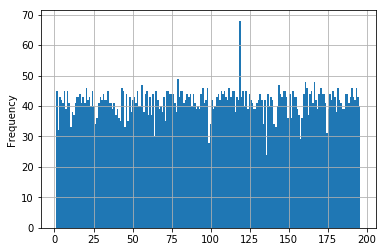

In [119]:
df_train['class'].plot.hist(grid =True, bins = 196)
groups

In [98]:
class2=df_train.set_index('class')

In [115]:
export_excel = df_train.to_excel('/Users/maxlim/Grab/cars_train_excel.xlsx')

# Data Modelling

Setting up CNN with  Keras 

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
import os


# Deep Learning libraries 
# import tensorflow as tf
import PIL as  pil 
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator, load_img
# from image import ImageDataGenerator

# Setting up the data for the images

Loading the folders with the data images and exploring them 

In [12]:
# Folder car_train data containing 8144 images for the training data 
car_train = "/Users/maxlim/Grab/cars_train/"
print('There are', len(os.listdir(car_train)),'images in the training dataset')
#os.listdir(car_train)

There are 8144 images in the training dataset


In [17]:
# Repeating it for the car_test data containing 8041 images for the training data 
car_test = "/Users/maxlim/Grab/cars_test/"
print('There are', len(os.listdir(car_test)),'images in the training dataset')
#os.listdir(car_test)

There are 8041 images in the training dataset


# Model for classification

In [67]:
model = Sequential()

#Adding 1st Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout 
#only for training data set; (0.2-0.5); 0.2 to start good on large network
#model.add(Dropout(0.2))

#Adding 2nd Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Adding 3rd Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Adding 4th Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Adding 5th Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Flatten
model.add(Flatten())

#Adding Input and Output Layer
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=196,activation='sigmoid'))

#Compile the Neural network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
#stuck here with the vaidation part 

In [66]:
#Data agumentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/Users/maxlim/Grab/cars_train',
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

valid_generator=train_datagen.flow_from_dataframe(
dataframe=cars_train,
directory='/Users/maxlim/Grab/cars_train',
x_col="id",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(128,128))

train_data

Found 0 images belonging to 0 classes.


In [69]:
model.fit(car_train, df_name, batch_size = 32, validation_split =0.2, epochs =3)


AttributeError: 'str' object has no attribute 'ndim'